In [41]:
import os
import cv2
import pandas as pd
import numpy as np
from image_augment_pairs import *
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate

In [49]:
#img_dir = './batch1'
img_dir = './no_aug_batch1'
img_dir = './'

In [44]:
def show_imgs(img_dir, img_no, i):

    print(img_no)
    
    images = np.load(os.path.join(img_dir, 'val_images_%d.npy' % img_no))[i]
    labels = np.load(os.path.join(img_dir, 'val_labels_%d.npy' % img_no))[i]
    preds = np.load(os.path.join(img_dir, 'val_preds_%d.npy' % img_no))[i]
    
    print(images.shape, labels.shape, np.sum(preds, axis=0).shape)
    print(images.dtype, labels.dtype, preds.dtype)

    plt.figure(figsize=(15,5))

    plt.subplot(131)
    plt.title('image')
    plt.imshow(images.transpose(1,2,0)[:,:,::-1])

    plt.subplot(132)
    plt.title('label')
    plt.imshow(labels)

    plt.subplot(133)
    plt.title('estimation')
    plt.imshow(preds)
    
    plt.show()
    
    plt.savefig('./%s_%d.png' % (img_dir, img_no))

In [45]:
def show_imgs_dis(img_no, i):

    print(img_no)
    
    images = np.load(os.path.join(img_dir, 'val_images_%d.npy' % img_no))[i]
    labels = np.load(os.path.join(img_dir, 'val_labels_%d.npy' % img_no))[i]
    preds = np.load(os.path.join(img_dir, 'val_preds_%d.npy' % img_no))[i]
    
    print(images.shape, labels.shape, preds.shape)
    print(images.dtype, labels.dtype, preds.dtype)

    plt.figure(figsize=(15,5))

    plt.subplot(131)
    plt.imshow(images.transpose(1,2,0)[:,:,::-1])

    plt.subplot(132)
    #plt.imshow(labels)
    plt.hist(labels.flatten())

    plt.subplot(133)
    #plt.imshow(np.sum(preds, axis=0))
    plt.hist(preds.flatten())
    
    plt.show()
    plt.savefig('./%s_%d.png' % ())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


70
(3, 256, 256) (256, 256) (256,)
float32 int64 int64


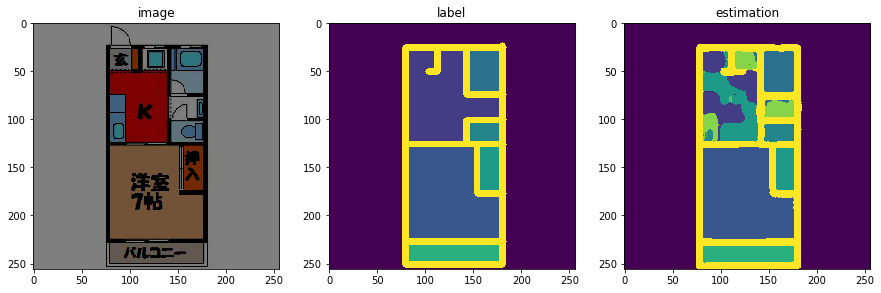

<Figure size 432x288 with 0 Axes>

In [134]:
for i in range(1):
    show_imgs('./no_aug_batch1', 70, i)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


70
(3, 256, 256) (256, 256) (256,)
float32 int64 int64


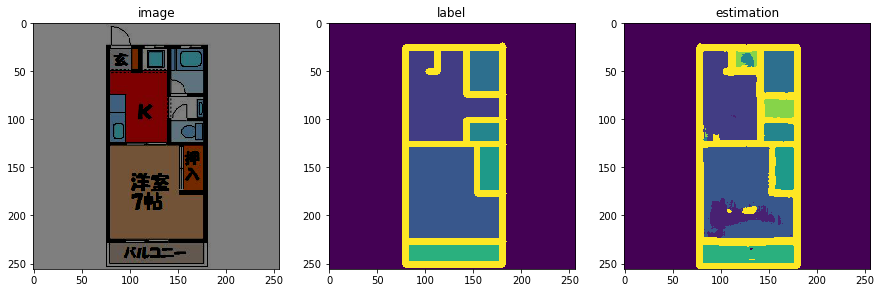

<Figure size 432x288 with 0 Axes>

In [135]:
for i in range(1):
    show_imgs('./aug_batch1', 70, i)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


70
(3, 256, 256) (256, 256) (256,)
float32 int64 int64


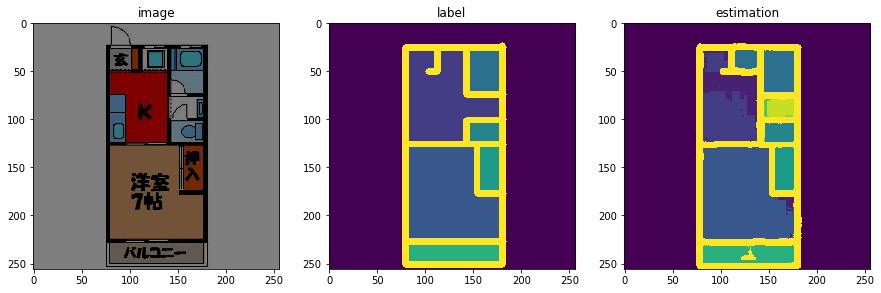

<Figure size 432x288 with 0 Axes>

In [136]:
for i in range(1):
    show_imgs('./hg_batch1', 70, i)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


20
(3, 256, 256) (256, 256) (256,)
float32 int64 int64


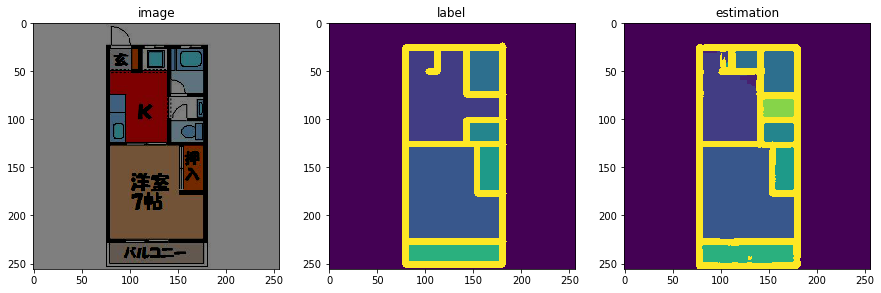

<Figure size 432x288 with 0 Axes>

In [52]:
for i in range(1):
    show_imgs('./batch1', 20, i)

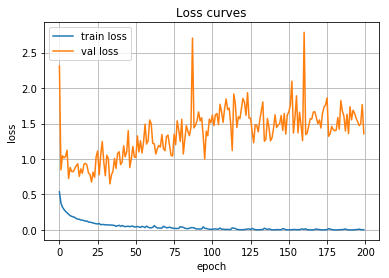

In [116]:
df = pd.read_csv('./no_aug_batch1/loss_classification.csv')

plt.plot(df['train'], label='train loss')
plt.plot(df['val'], label='val loss')

plt.title('Loss curves')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.savefig('./loss_classification.png')

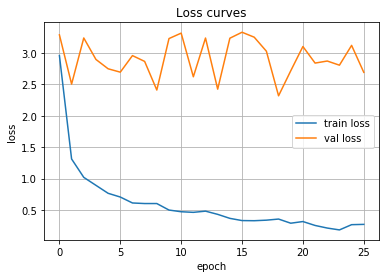

In [48]:
df = pd.read_csv('./batch1/loss_classification.csv')

plt.plot(df['train'], label='train loss')
plt.plot(df['val'], label='val loss')

plt.title('Loss curves')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.savefig('./loss_classification_hg.png')

### Image augmentation

In [17]:
img_dir = '../FloorplanTransformation/pytorch/img_label_arr_train'
out_dir = './augmented_data'

In [11]:
imgs = [f for f in os.listdir(img_dir) if 'image' in f]

In [32]:
for img in imgs:
    icon = img.replace('image', 'icon')
    room = img.replace('image', 'room')
    
    img_name = os.path.splitext(img)[0]
    icon_name = os.path.splitext(icon)[0]
    room_name = os.path.splitext(room)[0]
    print(img_name, icon_name, room_name)
    
    img_arr = np.load(os.path.join(img_dir, img)).transpose(1,2,0)
    icon_arr = np.load(os.path.join(img_dir, icon))
    room_arr = np.load(os.path.join(img_dir, room))
    print(img_arr.shape, icon_arr.shape, room_arr.shape)
    
    # 0
    np.save(os.path.join(out_dir, '%s_0.npy' % img_name), img_arr)
    np.save(os.path.join(out_dir, '%s_0.npy' % icon_name), icon_arr)
    np.save(os.path.join(out_dir, '%s_0.npy' % room_name), room_arr)
    
    # 0
    np.save(os.path.join(out_dir, '%s_0.npy' % img_name), img_arr)
    np.save(os.path.join(out_dir, '%s_0.npy' % icon_name), icon_arr)
    np.save(os.path.join(out_dir, '%s_0.npy' % room_name), room_arr)
    
    # 0
    np.save(os.path.join(out_dir, '%s_0.npy' % img_name), img_arr)
    np.save(os.path.join(out_dir, '%s_0.npy' % icon_name), icon_arr)
    np.save(os.path.join(out_dir, '%s_0.npy' % room_name), room_arr)
    
    
    # 1 -> 90 rotation
    np.save(os.path.join(out_dir, '%s_90.npy' % img_name), rotate(img_arr, 90))
    np.save(os.path.join(out_dir, '%s_90.npy' % icon_name), rotate(icon_arr, 90))
    np.save(os.path.join(out_dir, '%s_90.npy' % room_name), rotate(room_arr, 90))
    
    # 2 -> 90 rotation + h-flip
    np.save(os.path.join(out_dir, '%s_90_h.npy' % img_name), rotate(img_arr, 90)[:,::-1,:])
    np.save(os.path.join(out_dir, '%s_90_h.npy' % icon_name), rotate(icon_arr, 90)[:,::-1])
    np.save(os.path.join(out_dir, '%s_90_h.npy' % room_name), rotate(room_arr, 90)[:,::-1])
    
    # 3 -> 90 rotation + v-flip
    np.save(os.path.join(out_dir, '%s_90_v.npy' % img_name), rotate(img_arr, 90)[::-1,:,:])
    np.save(os.path.join(out_dir, '%s_90_v.npy' % icon_name), rotate(icon_arr, 90)[::-1,:])
    np.save(os.path.join(out_dir, '%s_90_v.npy' % room_name), rotate(room_arr, 90)[::-1,:])
    
    
    break

image_0000 icon_0000 room_0000
(256, 256, 3) (256, 256) (256, 256)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


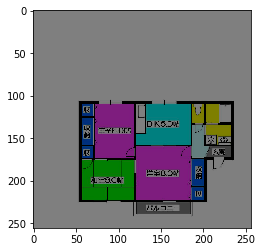

In [35]:
plt.imshow(img_arr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


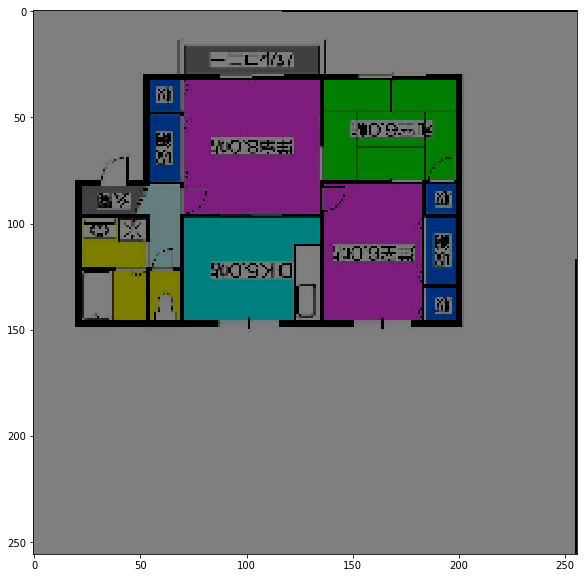

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(rotate(img_arr, 180))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


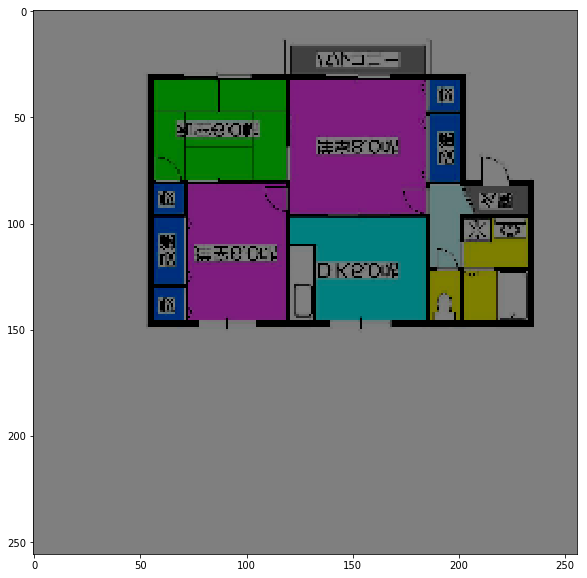

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(img_arr[::-1,:,:])